# Теория вероятностей и математическая статистика

## Урок 7

## Линейная регрессия. Двухвыборочный t-тест. A/B-тестирование

### Домашнее задание



В поле ответа впишите одно число. Нецелые числа следует округлить до 8 знаков после запятой.

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.


In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [3]:
X = pd.DataFrame(np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]))
X

,0,1,2,3
0,1.224013,2.308685,3.036364,2.692872
1,-0.187573,1.303374,5.120930,3.463632
2,-0.810945,1.824634,5.796865,1.861594
3,0.751290,2.673921,3.655298,1.667461
4,0.009724,1.973673,2.505943,1.697552
5,-0.629726,0.777508,2.841240,4.544106
6,2.295362,1.812067,1.950262,1.518746
7,0.092042,2.269714,7.477087,2.610812
8,2.392528,3.175640,3.614206,5.107734
9,0.549838,2.879887,1.657528,1.596360


In [4]:
Y = pd.DataFrame(np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]))

__метод наименьших квадратов__ заключается в минимизации расстояния между векторами $Y$ и $X \cdot b$:
$$\| Y - X \cdot b \| \rightarrow \min_b$$

аналитическое __решение__:
$$b = \left( X^\top X \right)^{-1} X^\top Y$$

In [5]:
def R2find(x2 , y2):
    ones = np.ones((x2.shape[0], 1))
    x2 = np.hstack((ones, x2))
    XTX = x2.T.dot(x2)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(x2.T).dot(y2)
    #print(b)
    z2 = x2.dot(b)
    e2 = y2 - z2
    #print(e2.mean())
    R2 = 1 - ((e2 - e2.mean()) ** 2).sum() / ((y2 - y2.mean()) ** 2).sum()
    return R2

In [6]:
R2max = 0
fi = 0
fj = 0
for i in range(0,4):
    for j in range(0,4):
        if i != j:
            x1 = pd.DataFrame({i:X.iloc[:,i],j: X.iloc[:,j]}).values #выбираем нужное сочетание признаков
            y1 = Y.values            
            print(f'Сочетание признаков {i} и {j} при коэф детерминации R2:{R2find(x1 , y1)}')                       
            if R2max < R2find(x1 , y1):
                R2max = R2find(x1 , y1)
                fi = i
                fj = j
            
print(f'Максимальный коэффициент детерминации: {R2max} при признаках: {fi} и {fj}')

Сочетание признаков 0 и 1 при коэф детерминации R2:0.18113594742585215
Сочетание признаков 0 и 2 при коэф детерминации R2:0.7634246238793152
Сочетание признаков 0 и 3 при коэф детерминации R2:0.4532966783144078
Сочетание признаков 1 и 0 при коэф детерминации R2:0.18113594742585226
Сочетание признаков 1 и 2 при коэф детерминации R2:0.5479482734039011
Сочетание признаков 1 и 3 при коэф детерминации R2:0.6062055761129932
Сочетание признаков 2 и 0 при коэф детерминации R2:0.763424623879315
Сочетание признаков 2 и 1 при коэф детерминации R2:0.5479482734039012
Сочетание признаков 2 и 3 при коэф детерминации R2:0.6224419876505325
Сочетание признаков 3 и 0 при коэф детерминации R2:0.45329667831440756
Сочетание признаков 3 и 1 при коэф детерминации R2:0.6062055761129934
Сочетание признаков 3 и 2 при коэф детерминации R2:0.6224419876505319
Максимальный коэффициент детерминации: 0.7634246238793152 при признаках: 0 и 2


In [7]:
x1

array([[2.69287214, 3.03636353],
       [3.46363202, 5.12093014],
       [1.86159445, 5.79686488],
       [1.66746094, 3.65529809],
       [1.69755173, 2.50594319],
       [4.54410559, 2.84124027],
       [1.51874636, 1.95026215],
       [2.61081203, 7.47708735],
       [5.10773362, 3.61420599],
       [1.59635987, 1.65752765]])

__Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

При F-тесте используем статистику:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$

In [8]:
from scipy import stats

In [9]:
x2 = pd.DataFrame({fi:X.iloc[:,fi],fj: X.iloc[:,fj]}).values
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли нулевой фактор
k1 = m
k2 = n - m - 1
print(n, m, k1, k2)

10 1 1 8


In [10]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Итак, критическая область:
$$\Omega_\alpha = \left( 5.31, \infty \right)$$

(0.0, 0.8)

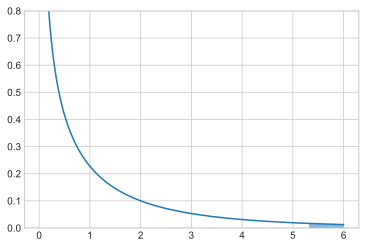

In [11]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.ylim(0, 0.8)

In [12]:
F = (R2max / k1) / ((1 - R2max) / k2)
F

25.81586085239463

In [13]:
print(f'Так как {F} входит в критическу область, отвергается нулева гипотеза Н0, то уравнение регрессии признается значимым. Ответ: 1')

Так как 25.81586085239463 входит в критическу область, отвергается нулева гипотеза Н0, то уравнение регрессии признается значимым. Ответ: 1


__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

In [14]:
# реализуем двухвыборочный t-тест 
n_a = 2589
r_a = 77
n_b = 1465
r_b = 60

In [15]:
a = np.zeros(n_a)
b = np.zeros(n_b)

In [16]:
for i in range(0,r_a):    
     a[i] = 1    
sum(a1)

NameError: name 'a1' is not defined

In [ ]:
for i in range(0,r_b):        
        b[i] = 1    
sum(b1)

In [ ]:
s1 = a.std(ddof=1)
s2 = b.std(ddof=1)
s1, s2

посчитаем значение $\sigma_\Delta$:

In [ ]:
s_delta = np.sqrt(s1 ** 2 / n_a + s2 ** 2 / n_b)
s_delta

In [ ]:
a.mean()

In [ ]:
# значение статистики
t = (a.mean() - b.mean()) / s_delta
t

In [ ]:
#число степеней свободы этого распределения
df = (s1 ** 2 / n_a + s2 ** 2 / n_b) ** 2 / \
    ((s1 ** 2 / n_a) ** 2 / (n_a - 1) + (s2 ** 2 / n_b) ** 2 / (n_b - 1))

df

In [ ]:
# Квантили при альфа = 0.05
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

In [ ]:
# проверка на встроенной функции
stats.ttest_ind(a, b, equal_var=False)

значение t - статистики -1,8197 не попало в критическу область до -1,96 и после 1,96. т.о. нулевая гипотеза принимается (конверсия на страницах А и Б) не отличается.
Ответ: 0